In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
import glob
import torch

/tmp/ipykernel_10412/3870592337.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
import ct_datasets
import models

In [4]:
dd = ct_datasets.get_data("total")

  0%|          | 0/1203 [00:00<?, ?it/s]

In [40]:
img = dd[380]['img']

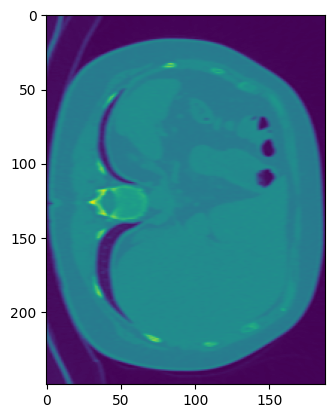

In [41]:
plt.imshow(img);

In [50]:
# import sys
# sys.path.insert(0,"/home/users/joecohen/workspace/taming-transformers/")
# import taming, taming.data, taming.data.ct

In [51]:
# ddd = taming.data.ct.CTTrain(128, "total")

In [52]:
# img = ddd[9]['image']

In [9]:
#!ls /home/users/joecohen/scratch/logs-transformers/*ct*

In [54]:
#weights_path = '/home/users/joecohen/scratch/logs-transformers/'
weights_path = '/home/groups/akshaysc/joecohen/weights/'

ae_folder = '2023-07-23T22-35-00_ct_vqgan_s'
ae = models.VQGAN(
    ckpt_path=f'{weights_path}/{ae_folder}/checkpoints/last.ckpt',
    yaml_path=glob.glob(f'{weights_path}/{ae_folder}/configs/*-project.yaml')[0],
)#.cuda()

Working with z of shape (1, 256, 48, 48) = 589824 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.


In [19]:
xp = ae(torch.ones(1,1,400,305))

In [20]:
xp.shape

torch.Size([1, 1, 400, 304])

In [21]:
img.shape

(294, 192)

In [44]:
xp = ae(torch.from_numpy(img[None,None,...]).float())

In [45]:
xp.shape

torch.Size([1, 1, 240, 176])

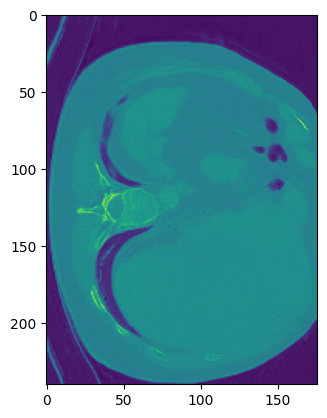

In [46]:
plt.imshow(xp.detach().numpy()[0][0]);

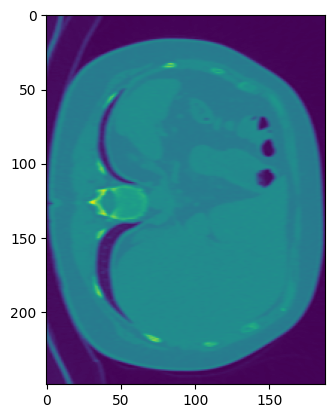

In [47]:
plt.imshow(img);

In [55]:
plt.imshow(np.concatenate([img,xp.detach().numpy()[0][0]],1));

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 249 and the array at index 1 has size 240